# Statistics Assignment-3 (Hypothesis Tests) 

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

*****
EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826


In [3]:
#H0: mu = 13.20
#H1: mu > 13.20

In [135]:
x_bar = 12.20 
n = 40
sigma = 2.5 
mu = 13.20 

In [136]:
z = (x_bar - mu) / (sigma/np.sqrt(n))
z

-2.5298221281347035

In [6]:
#standard error
sigma/np.sqrt(n)

0.3952847075210474

In [7]:
p_value = 1 - stats.norm.cdf(z)
p_value

0.005706018193000872

In [8]:
1 - stats.norm.cdf(13.20, 12.20, sigma/np.sqrt(n))

0.005706018193000872

In [9]:
alpha = 0.01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


*****
EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06



In [ ]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [139]:
soil = pd.read_csv("soil.csv")
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [110]:
soil.Soil1.mean()

1.6918

In [111]:
soil.Soil2.mean()

1.4171142857142855

In [140]:
indTest = stats.ttest_ind(soil.Soil1.dropna(), soil.Soil2)
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [113]:
alpha = 0.01
if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


*****
EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345
*****

In [ ]:
#H0: mu1 = mu2
#H1: mu1!= mu2

In [55]:
pisa = pd.read_csv("2015 PISA Test.csv",header=0,  na_filter = False) 
pisa.sample(10)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
54,POL,EU,67.997000,504.4693,505.6971,501.4353
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
32,ISL,EU,98.200000,488.0332,481.5255,473.2301
30,IDN,AS,21.976068,386.1096,397.2595,403.0997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
36,JPN,AS,91.058028,532.4399,515.9585,538.3948
55,PRT,EU,68.632900,491.6270,498.1289,501.1001
13,CRI,NA,59.762950,400.2534,427.4875,419.6080
64,TTO,SA,69.198471,417.2434,427.2733,424.5905
69,VNM,AS,43.500000,494.5183,486.7738,524.6445


In [58]:
pisa.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS          EU          NA  \
internet_users_per_100 count    2.000000   17.000000   37.000000    5.000000   
                       mean    43.359918   68.455613   77.274888   66.886792   
                       std      7.297226   21.086060   12.425773   14.364359   
                       min     38.200000   21.976068   53.744979   54.215766   
                       25%     40.779959   50.300000   68.632900   57.431043   
                       50%     43.359918   74.000000   76.184000   59.762950   
                       75%     45.939877   84.948353   87.479056   74.554202   
                       max     48.519836   92.884826   98.200000   88.470000   
Math                   count    2.000000   17.000000   37.000000    5.000000   
                       mean   363.212100  466.216647  477.981449  424.250960   
                       std      5.099513   64.356490   35.150403   71.717058   
                       min    359.606200  380.259000  371.311400  327.702000   
                       25%    361.409150  403.833200  464.040100  400.253400   
                       50%    363.212100  459.816000  489.728700  408.023500   
                       75%    365.015050  531.296100  503.722000  469.628500   
                       max    366.818000  564.189700  521.250600  515.647400   
Reading                count    2.000000   17.000000   37.000000    5.000000   
                       mean   355.457400  454.059682  476.164608  446.420920   
                       std      7.916909   57.048962   37.720545   66.614744   
                       min    349.859300  346.549000  351.741500  357.737700   
                       25%    352.658350  408.102200  452.514300  423.276500   
                       50%    355.457400  433.542300  487.250100  427.487500   
                       75%    358.256450  508.690500  499.814600  496.935100   
                       max    361.055500  535.100200  526.424700  526.667800   
Science                count    2.000000   17.000000   37.000000    5.000000   
                       mean   381.074250  467.945847  478.299381  438.180760   
                       std      7.536556   56.671371   34.450616   76.789918   
                       min    375.745100  386.485400  383.682400  331.638800   
                       25%    378.409675  417.611200  460.774900  415.709900   
                       50%    381.074250  456.483600  490.225000  419.608000   
                       75%    383.738825  523.277400  501.936900  496.242400   
                       max    386.403400  555.574700  534.193700  527.704700   

Continent_Code                        OC          SA  
internet_users_per_100 count    2.000000    7.000000  
                       mean    86.391704   60.180494  
                       std      2.589686    9.772455  
                       min     84.560519   40.900000  
                       25%     85.476112   57.116462  
                       50%     86.391704   64.289000  
                       75%     87.307296   66.321532  
                       max     88.222889   69.198471  
Math                   count    2.000000    7.000000  
                       mean   494.559750  402.887700  
                       std      0.938401   18.128894  
                       min    493.896200  377.069500  
                       25%    494.227975  388.102200  
                       50%    494.559750  409.033300  
                       75%    494.891525  417.617650  
                       max    495.223300  422.671400  
Reading                count    2.000000    7.000000  
                       mean   506.085650  425.359229  
                       std      4.504341   19.709688  
                       min    502.900600  397.541400  
                       25%    504.493125  416.126900  
                       50%    506.085650  425.303100  
                       75%    507.678175  431.922700  
                       max    509.27070

In [60]:
pisa.groupby("Continent_Code")["Math"].describe().T

Continent_Code,AF,AS,EU,NA,OC,SA
count,2.000000,17.000000,37.000000,5.000000,2.000000,7.000000
mean,363.212100,466.216647,477.981449,424.250960,494.559750,402.887700
std,5.099513,64.356490,35.150403,71.717058,0.938401,18.128894
min,359.606200,380.259000,371.311400,327.702000,493.896200,377.069500
25%,361.409150,403.833200,464.040100,400.253400,494.227975,388.102200
50%,363.212100,459.816000,489.728700,408.023500,494.559750,409.033300
75%,365.015050,531.296100,503.722000,469.628500,494.891525,417.617650
max,366.818000,564.189700,521.250600,515.647400,495.223300,422.671400


In [115]:
eu_math_mean = pisa[pisa["Continent_Code"] == "EU"]["Math"].mean()
eu_math_mean

477.98144864864867

In [116]:
as_math_mean = pisa[pisa["Continent_Code"] == "AS"]["Math"].mean()
as_math_mean

466.2166470588236

In [77]:
stats.ttest_ind(pisa[pisa["Continent_Code"] == "EU"]["Math"], pisa[pisa["Continent_Code"] == "AS"]["Math"])

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

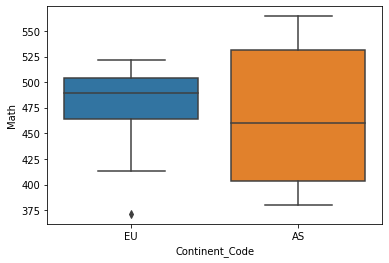

In [142]:
sns.boxplot(x=pisa["Continent_Code"], y=pisa["Math"], data=pisa, order= ["EU", "AS"]);

EXERCISE 4.  A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627